This Notebook contains the analysis of the question :

**What is the ideal time frame between a book's publication and its film adaptation?**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import re
import ast
import networkx as nx
import statsmodels.formula.api as smf

# Part I

In [84]:
df = pd.read_csv("./data/book_adaptation.csv")
df.columns

Index(['movie_title', 'movie_release', 'movie_revenue', 'movie_runtime',
       'movie_languages', 'movie_countries', 'movie_genres', 'imdb_rating',
       'imdb_total_votes', 'movie_budget', 'book_title', 'book_author',
       'book_release', 'book_country', 'book_part_of_series', 'literary_work',
       'written_work', 'comic_book_seris', 'book_series', 'manga_series',
       'book_fiction', 'book_non_fiction', 'book_children', 'book_historical',
       'book_drama', 'book_anime', 'book_fantasy', 'book_science_fiction',
       'book_horror', 'book_thriller', 'book_detective', 'book_satire',
       'book_comedy', 'book_won_price', 'book_pages', 'book_rating',
       'book_total_ratings', 'movie_is_adaptation'],
      dtype='object')

In [85]:
df = df[df["book_release"].notnull()]
df = df.drop(columns='movie_is_adaptation', axis=1).copy(deep=True)
df = df[df['movie_release'].notnull()].copy(deep=True)
df

,movie_title,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,imdb_rating,imdb_total_votes,movie_budget,...,book_science_fiction,book_horror,book_thriller,book_detective,book_satire,book_comedy,book_won_price,book_pages,book_rating,book_total_ratings
43,Mysterious Island,1982.0,NaN,100.0,"{""/m/0653m"": ""Standard Mandarin""}","{""/m/03h64"": ""Hong Kong""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/08322"":...",5.4,195.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
44,Mysterious Island,1982.0,NaN,100.0,"{""/m/0653m"": ""Standard Mandarin""}","{""/m/03h64"": ""Hong Kong""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/08322"":...",5.4,195.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
96,The Thirteen Chairs,1969.0,NaN,94.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/03rjj"": ""Italy""}","{""/m/05p553"": ""Comedy film"", ""/m/01z4y"": ""Come...",5.8,658.0,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
132,The Great Santini,1979.0,1.610553e+07,115.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02h8pkk"": ""Family Drama"", ""/m/07s9rl0"": ""...",7.2,6815.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
135,Carmen,2003.0,NaN,119.0,"{""/m/064_8sq"": ""French Language"", ""/m/06nm1"": ...","{""/m/06mkj"": ""Spain""}","{""/m/068d7h"": ""Romantic drama"", ""/m/02l7c8"": ""...",6.1,2262.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81913,Norwegian Wood,2010.0,1.903854e+07,133.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/068d7h"": ""Romantic drama"", ""/m/02l7c8"": ""...",6.3,12290.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
81937,The Four Feathers,1939.0,NaN,130.0,"{""/m/02h40lc"": ""English Language""}","{""/m/02jx1"": ""England"", ""/m/07ssc"": ""United Ki...","{""/m/03k9fj"": ""Adventure"", ""/m/082gq"": ""War fi...",7.4,6472.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
81944,How to Eat Fried Worms,2006.0,1.538269e+07,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hqxf"": ""Family Film"", ""/m/07s9rl0"": ""Dra...",5.3,5885.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
81961,Sherlock Holmes and the Voice of Terror,1942.0,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",6.4,5061.0,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN


In [86]:
df[['book_part_of_series', 'literary_work',
       'written_work', 'comic_book_seris', 'book_series', 'manga_series',
       'book_fiction', 'book_non_fiction', 'book_children', 'book_historical',
       'book_drama', 'book_anime', 'book_fantasy', 'book_science_fiction',
       'book_horror', 'book_thriller', 'book_detective', 'book_satire',
       'book_comedy', 'book_won_price']] = df[['book_part_of_series', 'literary_work',
       'written_work', 'comic_book_seris', 'book_series', 'manga_series',
       'book_fiction', 'book_non_fiction', 'book_children', 'book_historical',
       'book_drama', 'book_anime', 'book_fantasy', 'book_science_fiction',
       'book_horror', 'book_thriller', 'book_detective', 'book_satire',
       'book_comedy', 'book_won_price']].astype(int);

In [87]:
df["time_frame"] = (df['movie_release']-df['book_release']).astype(int)

In [88]:
df = df.query('time_frame > 0')
df

,movie_title,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,imdb_rating,imdb_total_votes,movie_budget,...,book_horror,book_thriller,book_detective,book_satire,book_comedy,book_won_price,book_pages,book_rating,book_total_ratings,time_frame
43,Mysterious Island,1982.0,NaN,100.0,"{""/m/0653m"": ""Standard Mandarin""}","{""/m/03h64"": ""Hong Kong""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/08322"":...",5.4,195.0,NaN,...,0,0,0,0,0,0,NaN,NaN,NaN,23
44,Mysterious Island,1982.0,NaN,100.0,"{""/m/0653m"": ""Standard Mandarin""}","{""/m/03h64"": ""Hong Kong""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/08322"":...",5.4,195.0,NaN,...,0,0,0,0,0,0,NaN,NaN,NaN,25
96,The Thirteen Chairs,1969.0,NaN,94.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/03rjj"": ""Italy""}","{""/m/05p553"": ""Comedy film"", ""/m/01z4y"": ""Come...",5.8,658.0,NaN,...,0,0,0,1,0,0,NaN,NaN,NaN,41
132,The Great Santini,1979.0,1.610553e+07,115.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02h8pkk"": ""Family Drama"", ""/m/07s9rl0"": ""...",7.2,6815.0,NaN,...,0,0,0,0,0,0,NaN,NaN,NaN,3
135,Carmen,2003.0,NaN,119.0,"{""/m/064_8sq"": ""French Language"", ""/m/06nm1"": ...","{""/m/06mkj"": ""Spain""}","{""/m/068d7h"": ""Romantic drama"", ""/m/02l7c8"": ""...",6.1,2262.0,NaN,...,0,0,0,0,0,0,NaN,NaN,NaN,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81913,Norwegian Wood,2010.0,1.903854e+07,133.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/068d7h"": ""Romantic drama"", ""/m/02l7c8"": ""...",6.3,12290.0,NaN,...,0,0,0,0,0,0,NaN,NaN,NaN,23
81937,The Four Feathers,1939.0,NaN,130.0,"{""/m/02h40lc"": ""English Language""}","{""/m/02jx1"": ""England"", ""/m/07ssc"": ""United Ki...","{""/m/03k9fj"": ""Adventure"", ""/m/082gq"": ""War fi...",7.4,6472.0,NaN,...,0,0,0,0,0,0,NaN,NaN,NaN,37
81944,How to Eat Fried Worms,2006.0,1.538269e+07,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hqxf"": ""Family Film"", ""/m/07s9rl0"": ""Dra...",5.3,5885.0,NaN,...,0,0,0,0,0,0,NaN,NaN,NaN,33
81961,Sherlock Holmes and the Voice of Terror,1942.0,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",6.4,5061.0,NaN,...,0,0,1,0,0,0,NaN,NaN,NaN,25


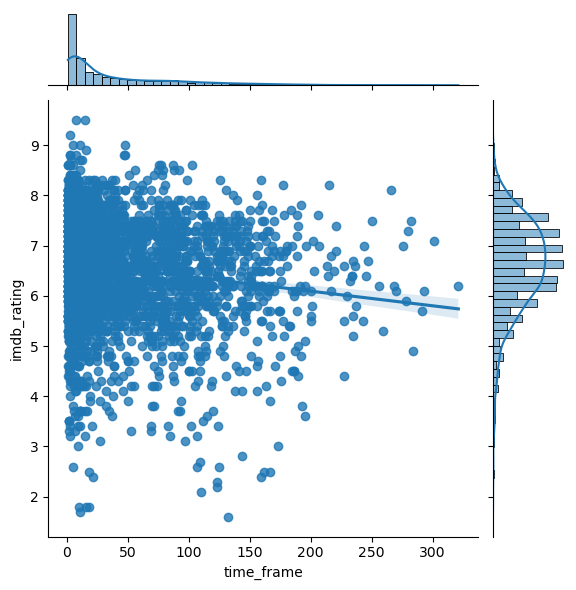

In [89]:
sns.jointplot(data=df,x=df['time_frame'], y=df['imdb_rating'], kind="reg");

In [90]:
mod = smf.ols(formula='imdb_rating ~ time_frame', data=df)
fit = mod.fit()
print(fit.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:            imdb_rating   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     80.95
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           3.67e-19
Time:                        15:12:26   Log-Likelihood:                -5016.0
No. Observations:                3598   AIC:                         1.004e+04
Df Residuals:                    3596   BIC:                         1.005e+04
Df Model:                           1                                         
Covariance Type:            nonrobust  

# Part II :

Exact Matching

In [91]:
time_frame_criteria = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [111]:
def get_coeff(time_frame_criteria, df):
    control = df.query('time_frame <='+str(time_frame_criteria))
    treated = df.query('time_frame >'+str(time_frame_criteria))

    G = nx.Graph()

    for control_id, control_row in control.iterrows():
        for treatment_id, treatment_row in treated.iterrows():
            serie = control_row['book_part_of_series'] == treatment_row['book_part_of_series']
            prize = control_row["book_won_price"] == treatment_row['book_won_price']
            same_era_book_release = abs(control_row['book_release']-treatment_row['book_release']) <= 5
            imdb_votes = abs(control_row["imdb_total_votes"] - treatment_row['imdb_total_votes']) <= 50
            if (serie and prize and same_era_book_release and imdb_votes):
                G.add_weighted_edges_from([(control_id, treatment_id, 1)])

    matching = nx.max_weight_matching(G)
    matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]
    matched_array = np.array(matched)
    matched_array
    matching_df = df.loc[matched_array]
    
    lin_reg_model = smf.ols(formula='imdb_rating ~ time_frame', data=matching_df)
    lin_reg_fit = lin_reg_model.fit()
    coeff = lin_reg_fit.params.time_frame
    
    return coeff

Linear Regression (imdb_rating ~ time_frame)

In [102]:
lin_reg_model = smf.ols(formula='imdb_rating ~ time_frame', data=matching_df)
lin_reg_fit = lin_reg_model.fit()
print(lin_reg_fit.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:            imdb_rating   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.954
Date:                Fri, 08 Dec 2023   Prob (F-statistic):              0.163
Time:                        15:23:30   Log-Likelihood:                -863.74
No. Observations:                 654   AIC:                             1731.
Df Residuals:                     652   BIC:                             1740.
Df Model:                           1                                         
Covariance Type:            nonrobust  

In [110]:
lin_reg_fit.params.time_frame

-0.0030509544416108016

In [113]:
coeff_time_frame = np.zeros([len(time_frame_criteria), 2])
for i in time_frame_criteria:
    coeff_time_frame[int(i/5-1),0] = i
    coeff = get_coeff(i+0.1, df)
    coeff_time_frame[int(i/5-1),1] = coeff

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [134]:
coeffs = pd.DataFrame(coeff_time_frame, columns=["time_frame", "coeff"])

0     5.0
1    10.0
2    15.0
3    20.0
4    25.0
5    30.0
6    35.0
7    40.0
8    45.0
9    50.0
Name: time_frame, dtype: float64

<Axes: xlabel='time_frame', ylabel='coeff'>

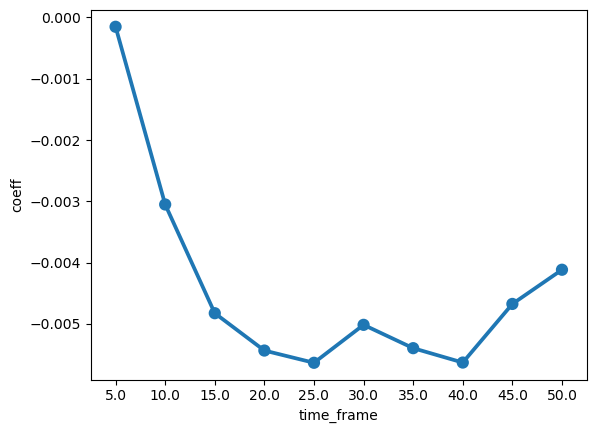

In [147]:
sns.pointplot(x="time_frame", y="coeff", data=coeffs)